In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set

mostrecent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print (mostrecent)

('2017-08-23',)


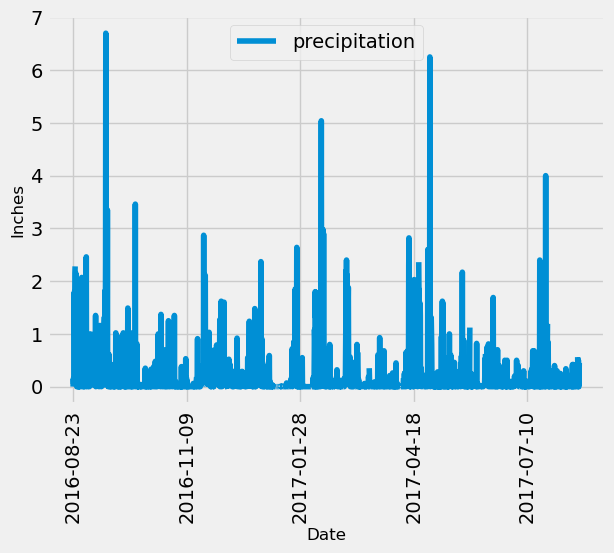

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(mostrecent[0], '%Y-%m-%d')
querydate = dt.date(one_year_ago.year -1, one_year_ago.month, one_year_ago.day)
querydate

# Perform a query to retrieve the data and precipitation scores
precipitation=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=year_ago).order_by(Measurement.date).all()
precipitation

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df_precipitation=pd.DataFrame(precipitation,columns=['date', 'precipitation'])
df_precipitation.set_index('date', inplace=True)

# Sort the dataframe by date
df_precipitation.head()

# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot()
plt.ylabel("Inches", size=12)
plt.xlabel("Date", size=12)
plt.xticks(rotation=90)
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_precipitation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
stations_total=session.query(Measurement.station).group_by(Measurement.station).count()
stations_total

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
.filter(Measurement.station == 'USC00519281').all()

[(54.0, 71.66378066378067, 85.0)]

<function matplotlib.pyplot.show(close=None, block=None)>

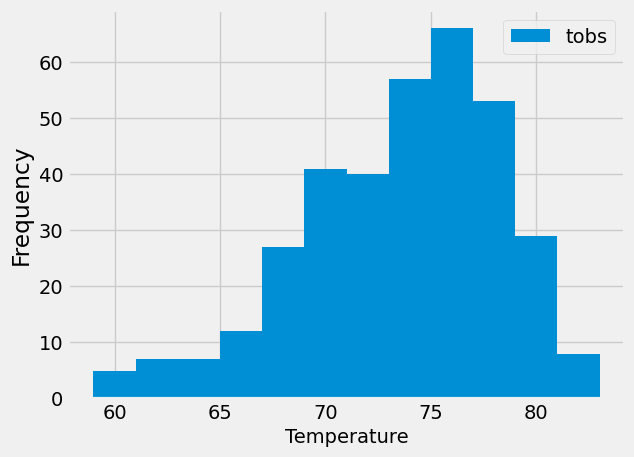

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= year_ago).all()
tobs_df = pd.DataFrame(tobs)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

tobs_df.plot.hist(bins=12)
plt.xlabel("Temperature", fontsize=14)
plt.show

# Close Session

In [47]:
# Close Session
session.close()